In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
data = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
print(data.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [9]:
# عرض أبعاد البيانات (عدد الصفوف والأعمدة)
print("\nعدد الصفوف والأعمدة:", data.shape)


عدد الصفوف والأعمدة: (1470, 35)


In [ ]:
#  Age :
# العمر: عمر الموظف.
# نوع البيانات: عدد صحيح (Integer).
# 2. Attrition :
# الاستقالة / مغادرة الشركة: هل غادر الموظف الشركة؟
# القيم: "Yes" أو "No".
# هذا هو المتغير المستهدف (Target Variable) الذي نريد التنبؤ به.
# 3. BusinessTravel :
# السفر التجاري: مدى تكرار سفر الموظف لأغراض العمل.
# 4. DailyRate :
# المعدل اليومي للأجر: راتب الموظف يوميًا (عدد).
# نوع البيانات: عدد صحيح (Integer).
# 5. Department :
# القسم: القسم الذي يعمل فيه الموظف.
# 6. DistanceFromHome :
# المسافة من المنزل إلى مكان العمل (بالكيلومترات أو أميال).
# نوع البيانات: عدد صحيح.
# 7. Education :
# مستوى التعليم: يُشير إلى المستوى التعليمي للموظف.
# نوع البيانات: عدد صحيح.
# 8. EducationField :
# مجال التعليم: التخصص الدراسي للموظف.
# 9. EmployeeCount :
# عدد الموظفين: غالبًا يكون 1 لكل صف (ربما لتوثيق العدد الإجمالي).
# 10. EmployeeNumber :
# رقم الموظف: معرف فريد لكل موظف.


# 23. RelationshipSatisfaction :
# رضا العلاقات: مدى رضا الموظف عن علاقاته مع الزملاء والمديرين.
# 24. StandardHours :
# ساعات العمل القياسية: عدد الساعات القياسية التي يجب أن يعملها الموظف.
# 25. StockOptionLevel :
# مستوى خيار الأسهم: مستوى الخيارات المالية (أسهم الشركة).
# 26. TotalWorkingYears :
# سنوات الخبرة الإجمالية: عدد السنوات التي عملها الموظف في حياته المهنية حتى الآن.
# 27. TrainingTimesLastYear :
# عدد مرات التدريب خلال السنة الماضية.
# 28. WorkLifeBalance :
# التوازن بين العمل والحياة الشخصية.
# 29. YearsAtCompany :
# عدد السنوات التي عملها الموظف في الشركة الحالية.
# 30. YearsInCurrentRole :
# عدد السنوات في الدور الحالي (المنصب الحالي).
# 31. YearsSinceLastPromotion :
# عدد السنوات منذ آخر ترقية للموظف.
# 32. YearsWithCurrManager :
# عدد السنوات التي عمل فيها الموظف تحت إشراف نفس المدير.

In [8]:
# عرض عدد الاستقالات "Yes" و"No"
print("\nتوزيع Attrition:")
print(data['Attrition'].value_counts())


توزيع Attrition:
Attrition
No     1233
Yes     237
Name: count, dtype: int64


In [10]:
# عرض نوع البيانات لكل عمود
print("\nأنواع البيانات:")
print(data.dtypes)

# التحقق من وجود بيانات مفقودة
print("\nهل هناك بيانات مفقودة؟")
print(data.isnull().sum().any())


أنواع البيانات:
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
Tot

In [11]:
# لتخصيص شكل الرسوم البيانية
sns.set(style="whitegrid")

<ipython-input-16-3350496987>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Attrition', palette='Set2')


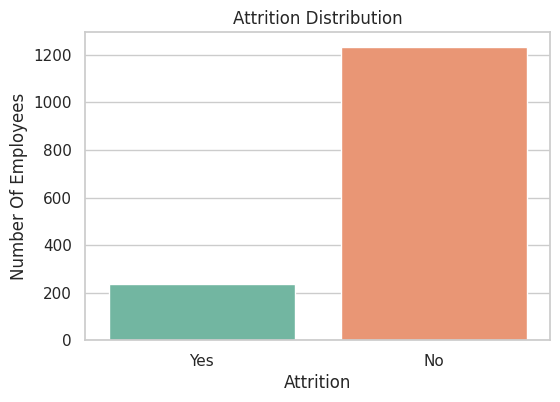

In [16]:
#  توزيع Attrition (استقال / لم يستقل)
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Attrition', palette='Set2')
plt.title('Attrition Distribution')
plt.xlabel('Attrition')
plt.ylabel('Number Of Employees')
plt.show()

<ipython-input-17-2640559086>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Attrition')


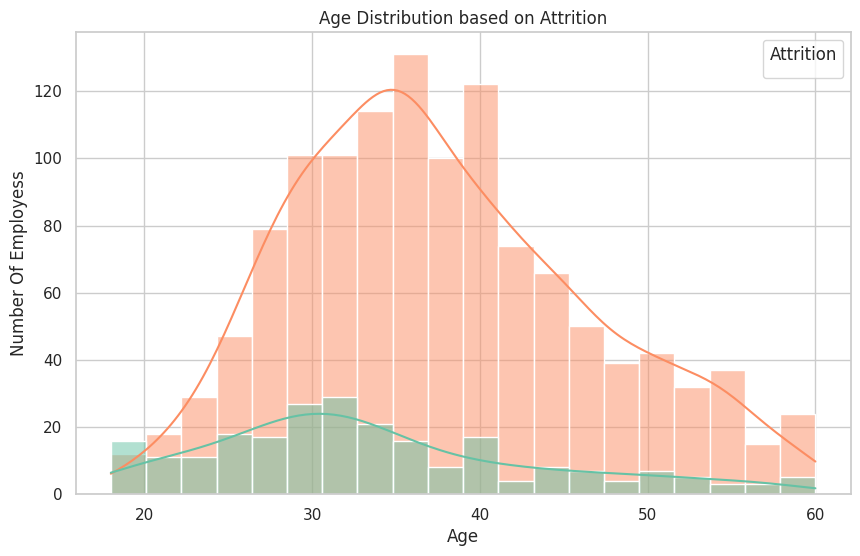

In [17]:
#  العلاقة بين العمر (Age) والاستقالة
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='Age', hue='Attrition', bins=20, kde=True, palette='Set2')
plt.title('Age Distribution based on Attrition')
plt.xlabel('Age')
plt.ylabel('Number Of Employess')
plt.legend(title='Attrition')
plt.show()

<ipython-input-18-2226276203>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Attrition', y='MonthlyIncome', palette='Set2')


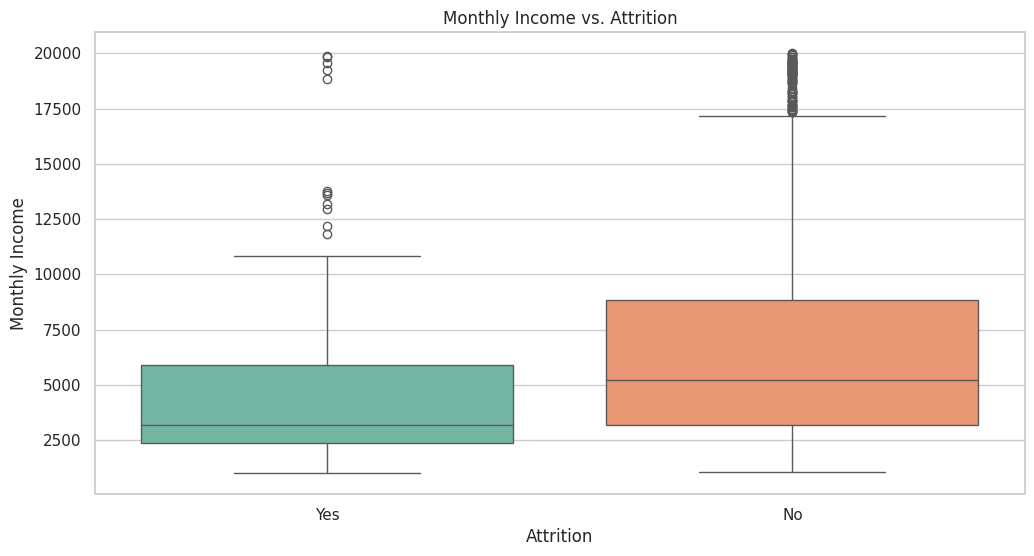

<ipython-input-19-2226276203>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Attrition', y='MonthlyIncome', palette='Set2')


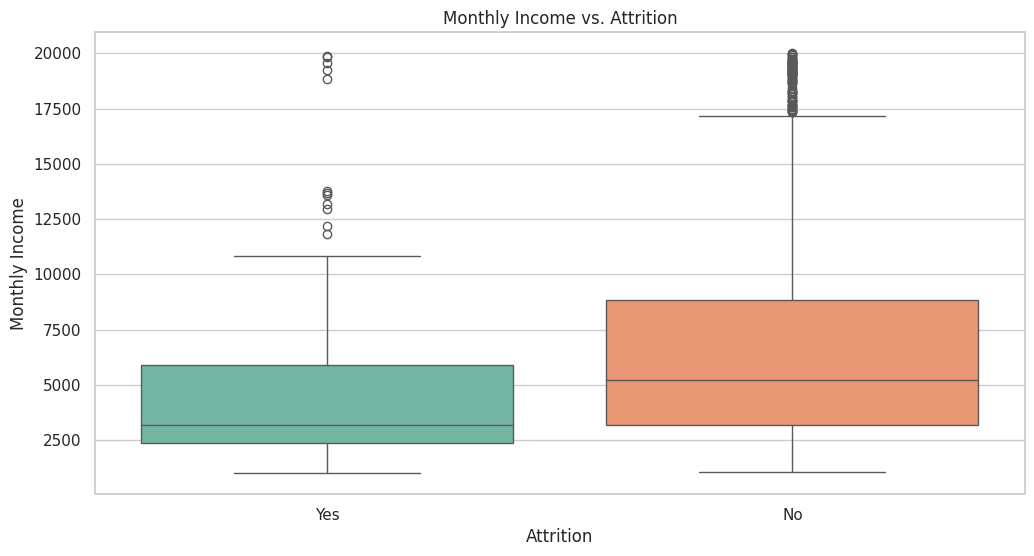

In [19]:
# العلاقة بين الدخل الشهري (MonthlyIncome) والاستقالة
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Attrition', y='MonthlyIncome', palette='Set2')
plt.title('Monthly Income vs. Attrition')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.show()

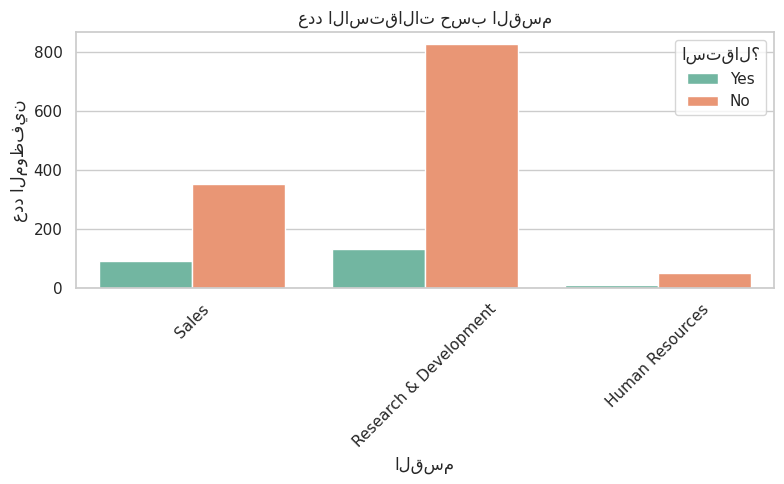

In [21]:
# عدد الاستقالات حسب القسم (Department)
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='Department', hue='Attrition', palette='Set2')
plt.title('عدد الاستقالات حسب القسم')
plt.xlabel('القسم')
plt.ylabel('عدد الموظفين')
plt.legend(title='استقال؟')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
attrited_employees = data[data['Attrition'] == 'Yes']
display(attrited_employees.head())

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,...,2,80,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,...,2,80,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,...,3,80,0,8,2,3,4,2,1,3


<ipython-input-24-1485414148>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Attrition', y='YearsAtCompany', palette='Set2')


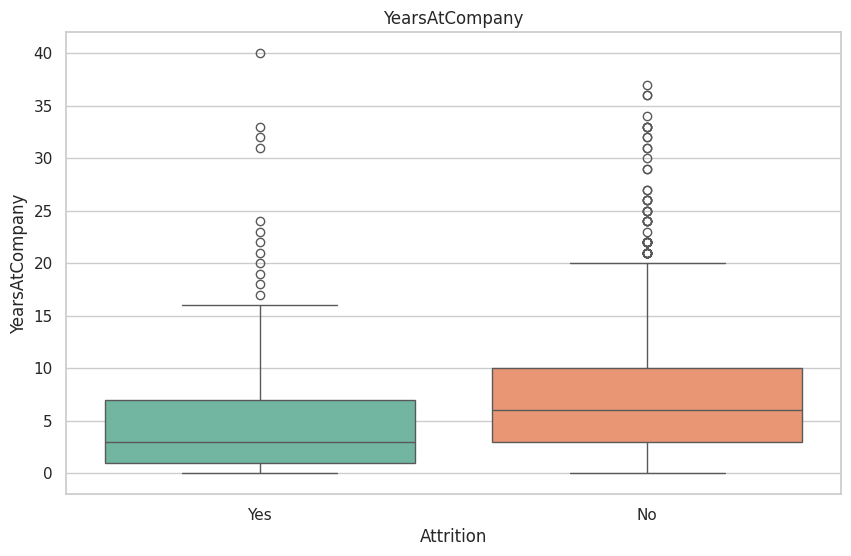

In [24]:
#  تأثير YearsAtCompany على Attrition
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='Attrition', y='YearsAtCompany', palette='Set2')
plt.title('YearsAtCompany')
plt.xlabel('Attrition')
plt.ylabel('YearsAtCompany')
plt.show()

In [ ]:
# الموظفين الجدد أو ذوي الخبرة المتوسطة هم الأكثر استقالة.

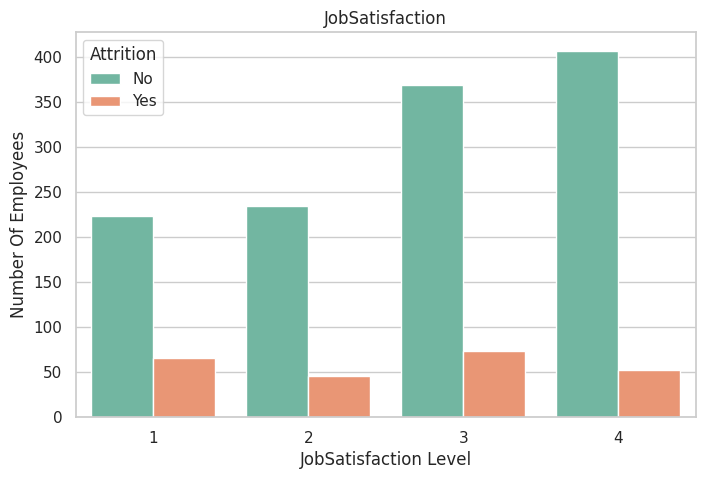

In [26]:
# تحليل رضا الموظف عن العمل (Job Satisfaction)
if 'JobSatisfaction' in data.columns:
    plt.figure(figsize=(8,5))
    sns.countplot(data=data, x='JobSatisfaction', hue='Attrition', palette='Set2')
    plt.title('JobSatisfaction')
    plt.xlabel('JobSatisfaction Level')
    plt.ylabel('Number Of Employees')
    plt.legend(title='Attrition')
    plt.show()
else:
    print("العمود JobSatisfaction غير موجود في البيانات.")

<ipython-input-33-1768859370>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Attrition')


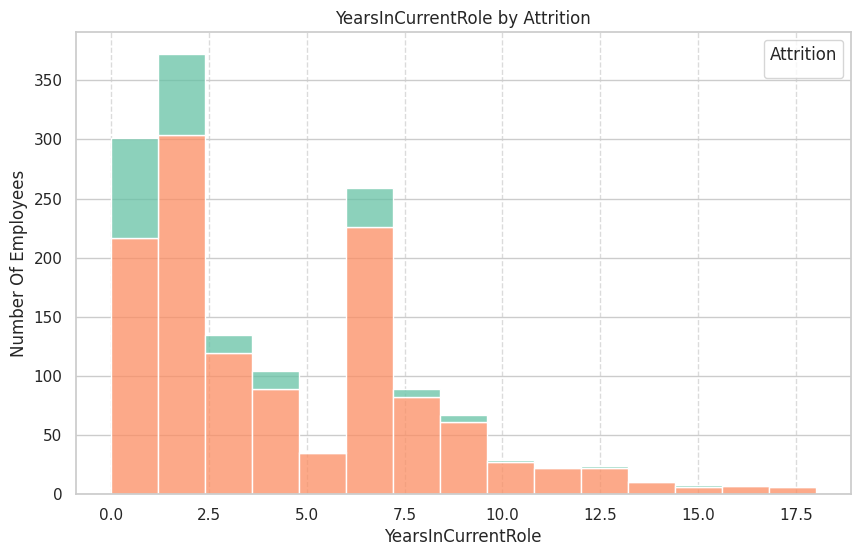

In [33]:
# معدل الاستقالة حسب عدد السنوات في الدور الحالي

plt.figure(figsize=(10,6))
sns.histplot(data=data, x='YearsInCurrentRole', hue='Attrition', bins=15, multiple='stack', palette='Set2')
plt.title('YearsInCurrentRole by Attrition')
plt.xlabel('YearsInCurrentRole')
plt.ylabel('Number Of Employees')
plt.legend(title='Attrition')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

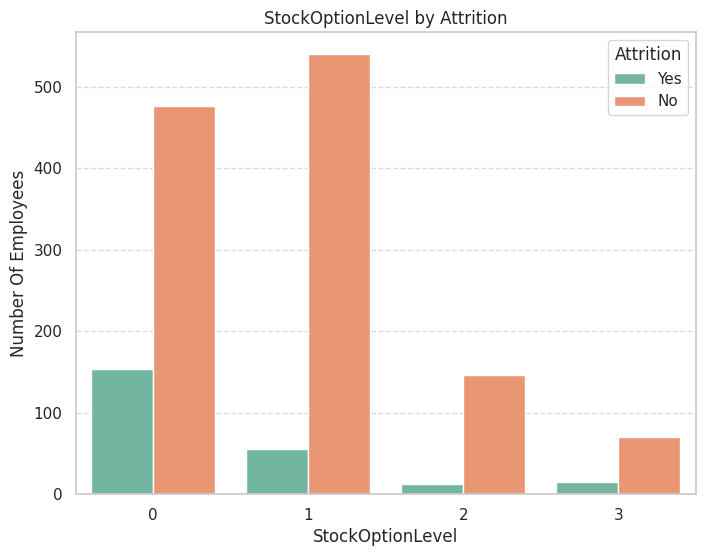

In [35]:
# العلاقة بين مستوى خيار الأسهم (StockOptionLevel) والاستقالة
plt.figure(figsize=(8,6))
sns.countplot(data=data, x='StockOptionLevel', hue='Attrition', palette='Set2')
plt.title('StockOptionLevel by Attrition')
plt.xlabel('StockOptionLevel')
plt.ylabel('Number Of Employees')
plt.legend(title='Attrition')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

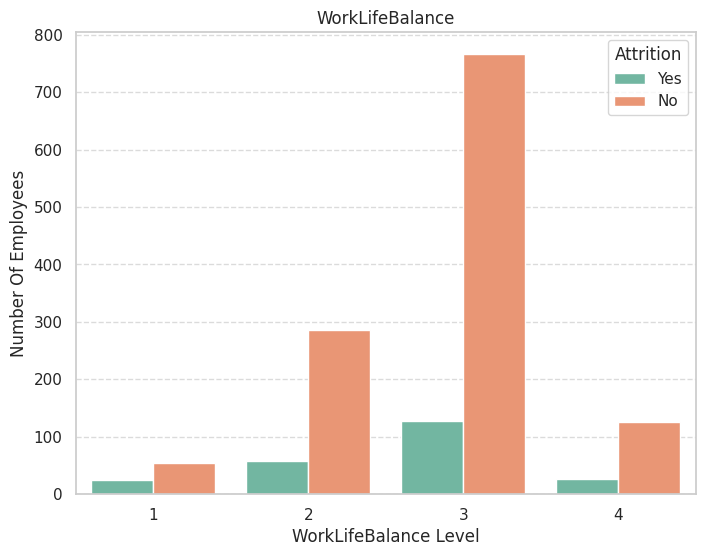

In [37]:
#  التوازن بين العمل والحياة الشخصية (WorkLifeBalance) والاستقالة

plt.figure(figsize=(8,6))
sns.countplot(data=data, x='WorkLifeBalance', hue='Attrition', palette='Set2')
plt.title('WorkLifeBalance')
plt.xlabel('WorkLifeBalance Level')
plt.ylabel('Number Of Employees')
plt.legend(title='Attrition')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

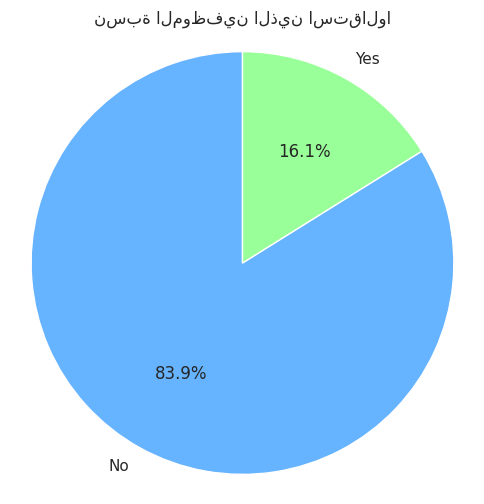

In [40]:
# حساب عدد الاستقالات
attrition_counts = data['Attrition'].value_counts()

# رسم بياني دائري
plt.figure(figsize=(6,6))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'])
plt.title('نسبة الموظفين الذين استقالوا')
plt.axis('equal')  # يجعل الشكل دائريًا
plt.show()

<Figure size 1000x800 with 0 Axes>

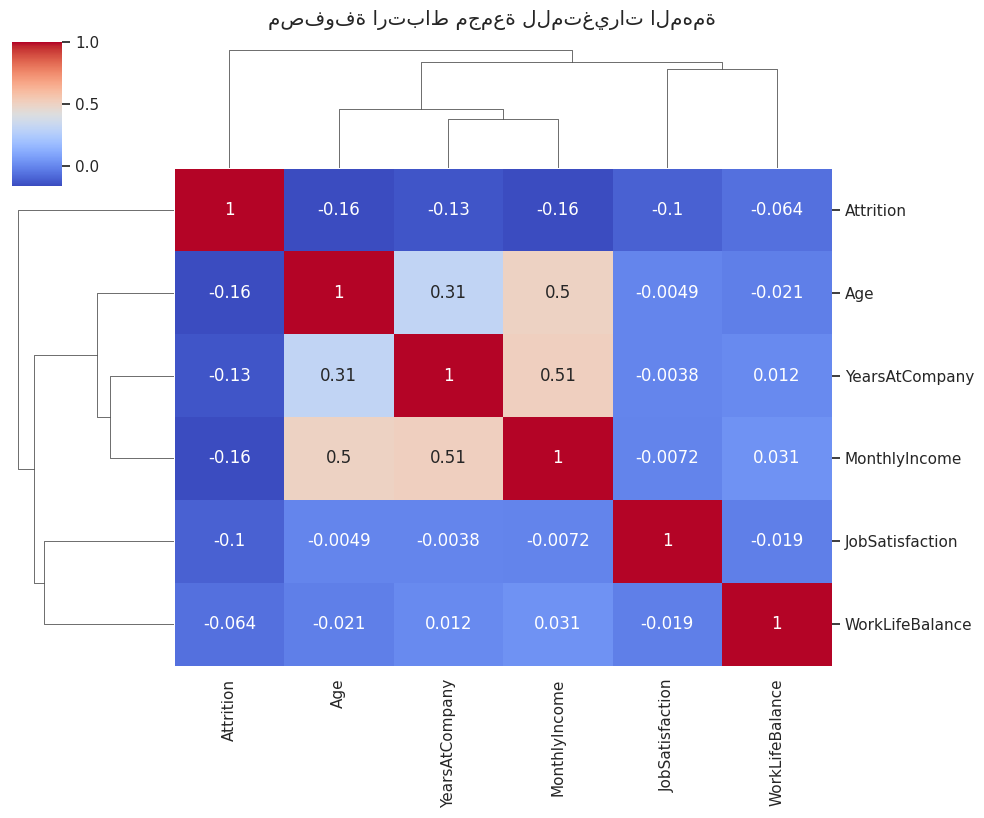

In [41]:
# رسم تجميعي (Cluster Map) للمتغيرات العددية المهمة
# هذا الرسم يوضح العلاقات بين المتغيرات المهمة
important_cols = ['Age', 'YearsAtCompany', 'JobSatisfaction', 'MonthlyIncome', 'WorkLifeBalance', 'Attrition']

# تحويل Attrition إلى رقمي للتحليل
df_corr = data[important_cols].copy()
df_corr['Attrition'] = df_corr['Attrition'].map({'No': 0, 'Yes': 1})

# إزالة الصفوف الفارغة
df_corr = df_corr.dropna()

# حساب الارتباط
corr_matrix = df_corr.corr()

# رسم Cluster Map
plt.figure(figsize=(10,8))
sns.clustermap(corr_matrix, annot=True, cmap='coolwarm', figsize=(10,8))
plt.suptitle('مصفوفة ارتباط مجمعة للمتغيرات المهمة', y=1.02)
plt.show()

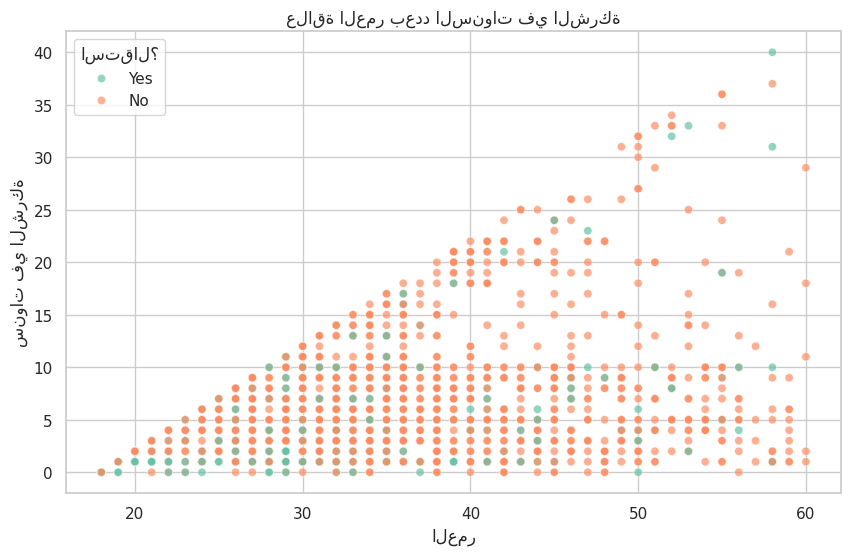

In [42]:
# سم التشتت (Scatter Plot) بين العمر وسنوات العمل
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='Age', y='YearsAtCompany', hue='Attrition', alpha=0.7, palette='Set2')
plt.title('علاقة العمر بعدد السنوات في الشركة')
plt.xlabel('العمر')
plt.ylabel('سنوات في الشركة')
plt.legend(title='استقال؟')
plt.grid(True)
plt.show()

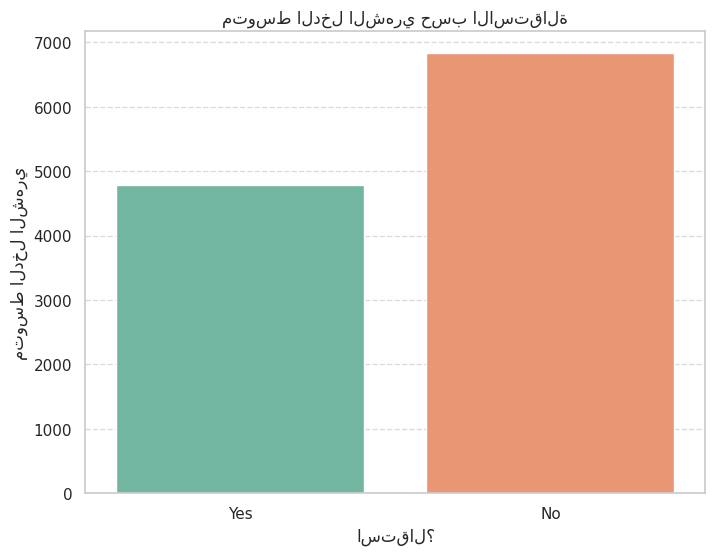

In [43]:
# رسم عمودي متوسط الدخل الشهري حسب الاستقالة
plt.figure(figsize=(8,6))
sns.barplot(data=data, x='Attrition', y='MonthlyIncome', ci=None, palette='Set2')
plt.title('متوسط الدخل الشهري حسب الاستقالة')
plt.xlabel('استقال؟')
plt.ylabel('متوسط الدخل الشهري')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

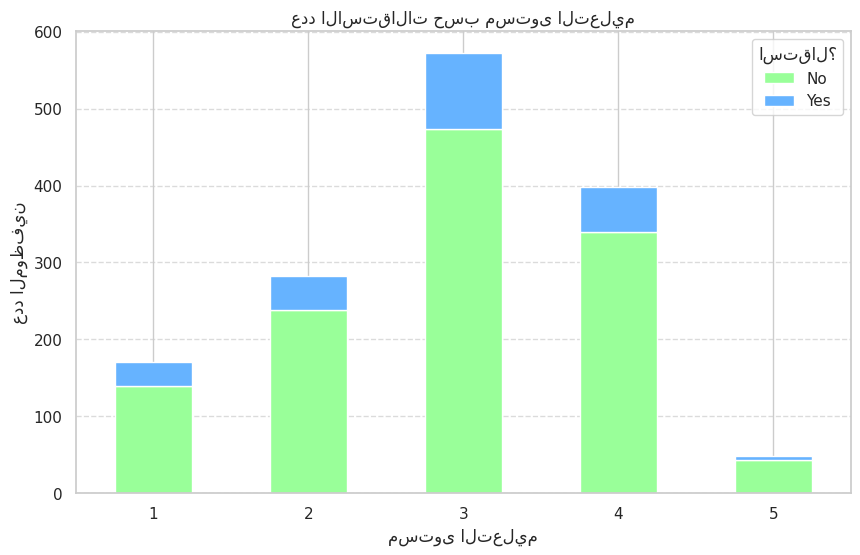

In [44]:
# رسم تراكمي (Stacked Bar Chart) لعدد الاستقالات حسب مستوى التعليم
# تحويل EducationField إلى فئات مرقمة إذا لم يكن كذلك
education_attrition = pd.crosstab(data['Education'], data['Attrition'])

# رسم العموديات المتراكبة
education_attrition.plot(kind='bar', stacked=True, figsize=(10,6), color=['#99ff99','#66b3ff'])
plt.title('عدد الاستقالات حسب مستوى التعليم')
plt.xlabel('مستوى التعليم')
plt.ylabel('عدد الموظفين')
plt.xticks(rotation=0)
plt.legend(title='استقال؟')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

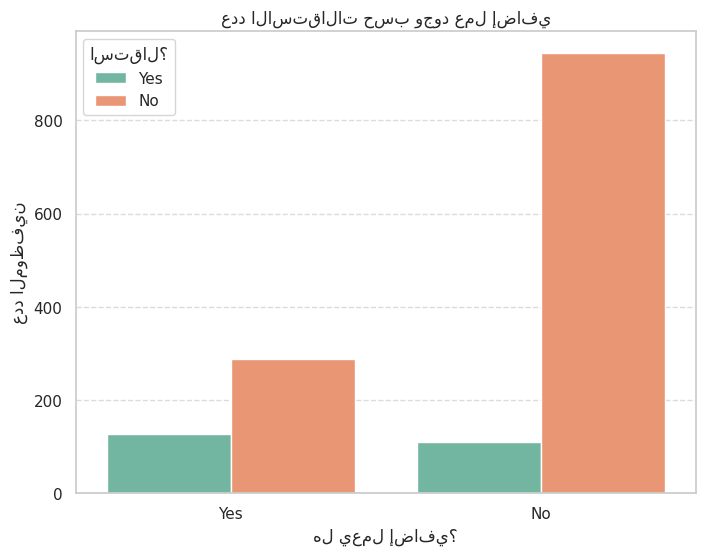

In [45]:
# العلاقة بين العمل الإضافي (OverTime) والاستقالة
plt.figure(figsize=(8,6))
sns.countplot(data=data, x='OverTime', hue='Attrition', palette='Set2')
plt.title('عدد الاستقالات حسب وجود عمل إضافي')
plt.xlabel('هل يعمل إضافي؟')
plt.ylabel('عدد الموظفين')
plt.legend(title='استقال؟')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-46-1934079158>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='استقال؟')


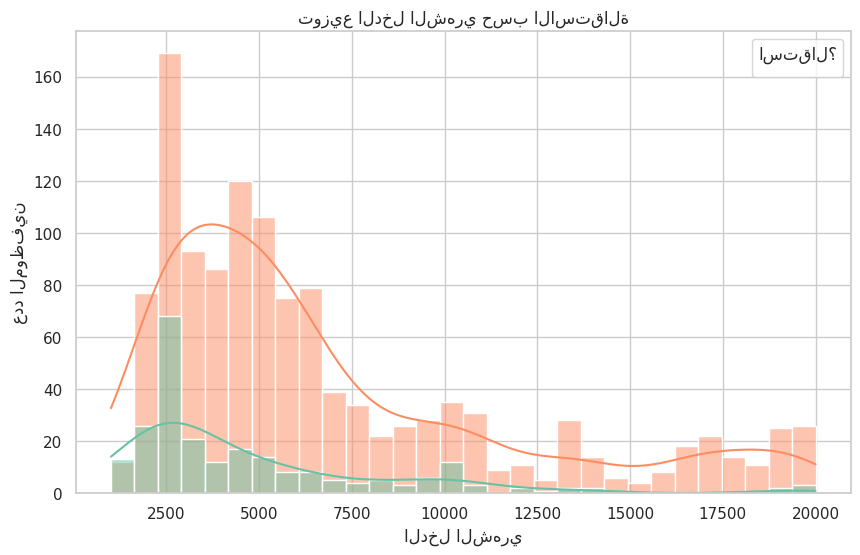

In [46]:
# توزيع الدخل الشهري (MonthlyIncome) حسب الاستقالة
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='MonthlyIncome', hue='Attrition', bins=30, kde=True, palette='Set2')
plt.title('توزيع الدخل الشهري حسب الاستقالة')
plt.xlabel('الدخل الشهري')
plt.ylabel('عدد الموظفين')
plt.legend(title='استقال؟')
plt.grid(True)
plt.show()

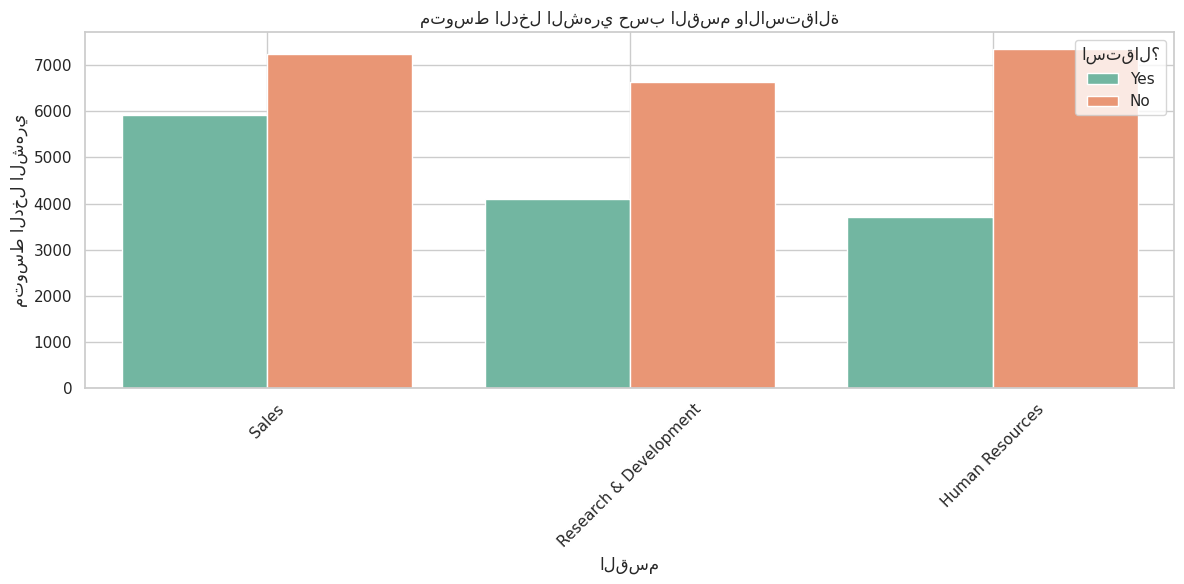

In [47]:
#  متوسط الدخل الشهري لكل قسم مع تمييز الاستقالة
plt.figure(figsize=(12,6))
sns.barplot(data=data, x='Department', y='MonthlyIncome', hue='Attrition', ci=None, estimator=np.mean, palette='Set2')
plt.title('متوسط الدخل الشهري حسب القسم والاستقالة')
plt.xlabel('القسم')
plt.ylabel('متوسط الدخل الشهري')
plt.xticks(rotation=45)
plt.legend(title='استقال؟')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-48-2917189821>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='استقال؟')


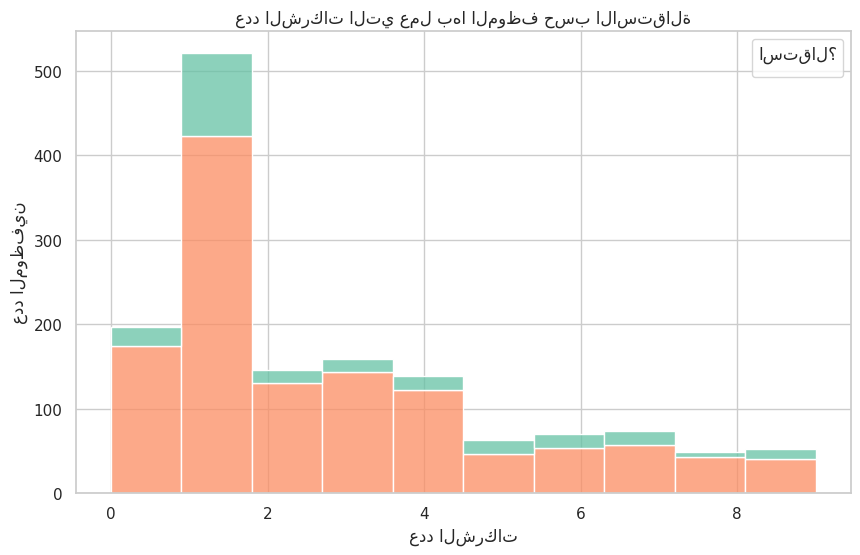

In [48]:
# عدد الشركات التي عمل بها الموظف وتأثيرها على الاستقالة
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='NumCompaniesWorked', hue='Attrition', bins=10, multiple='stack', palette='Set2')
plt.title('عدد الشركات التي عمل بها الموظف حسب الاستقالة')
plt.xlabel('عدد الشركات')
plt.ylabel('عدد الموظفين')
plt.legend(title='استقال؟')
plt.grid(True)
plt.show()

<ipython-input-49-1176077910>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='استقال؟')


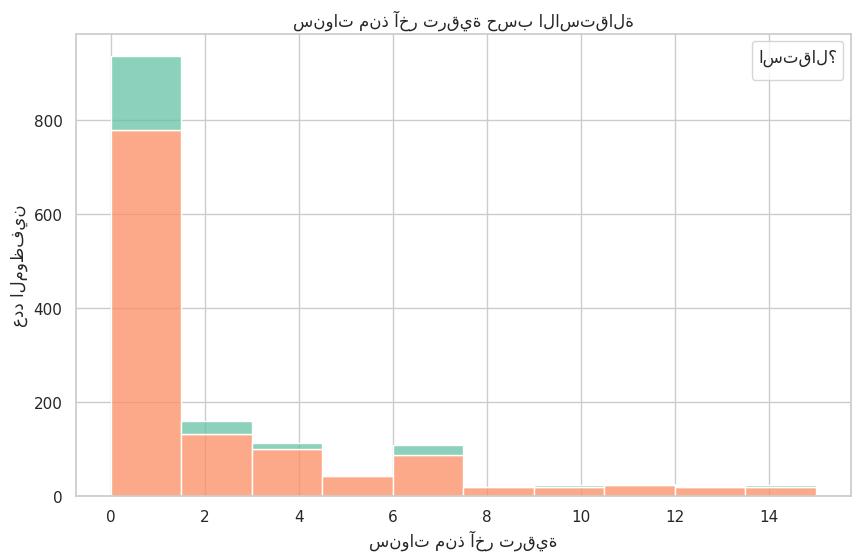

In [49]:
# توزيع السنوات منذ آخر ترقية حسب الاستقالة
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='YearsSinceLastPromotion', hue='Attrition', bins=10, multiple='stack', palette='Set2')
plt.title('سنوات منذ آخر ترقية حسب الاستقالة')
plt.xlabel('سنوات منذ آخر ترقية')
plt.ylabel('عدد الموظفين')
plt.legend(title='استقال؟')
plt.grid(True)
plt.show()

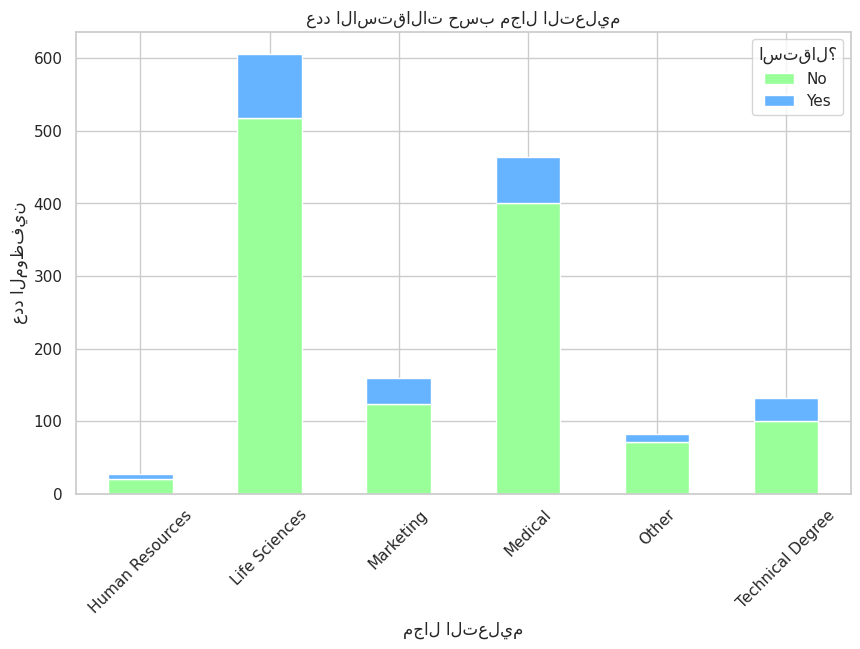

In [52]:
#  رسم عمودي مزدوج: مستوى التعليم واستقالة الموظف
education_field_attrition = pd.crosstab(data['EducationField'], data['Attrition'])
education_field_attrition.plot(kind='bar', stacked=True, figsize=(10,6), color=['#99ff99','#66b3ff'])
plt.title('عدد الاستقالات حسب مجال التعليم')
plt.xlabel('مجال التعليم')
plt.ylabel('عدد الموظفين')
plt.xticks(rotation=45)
plt.legend(title='استقال؟')
plt.grid(True)
plt.show()

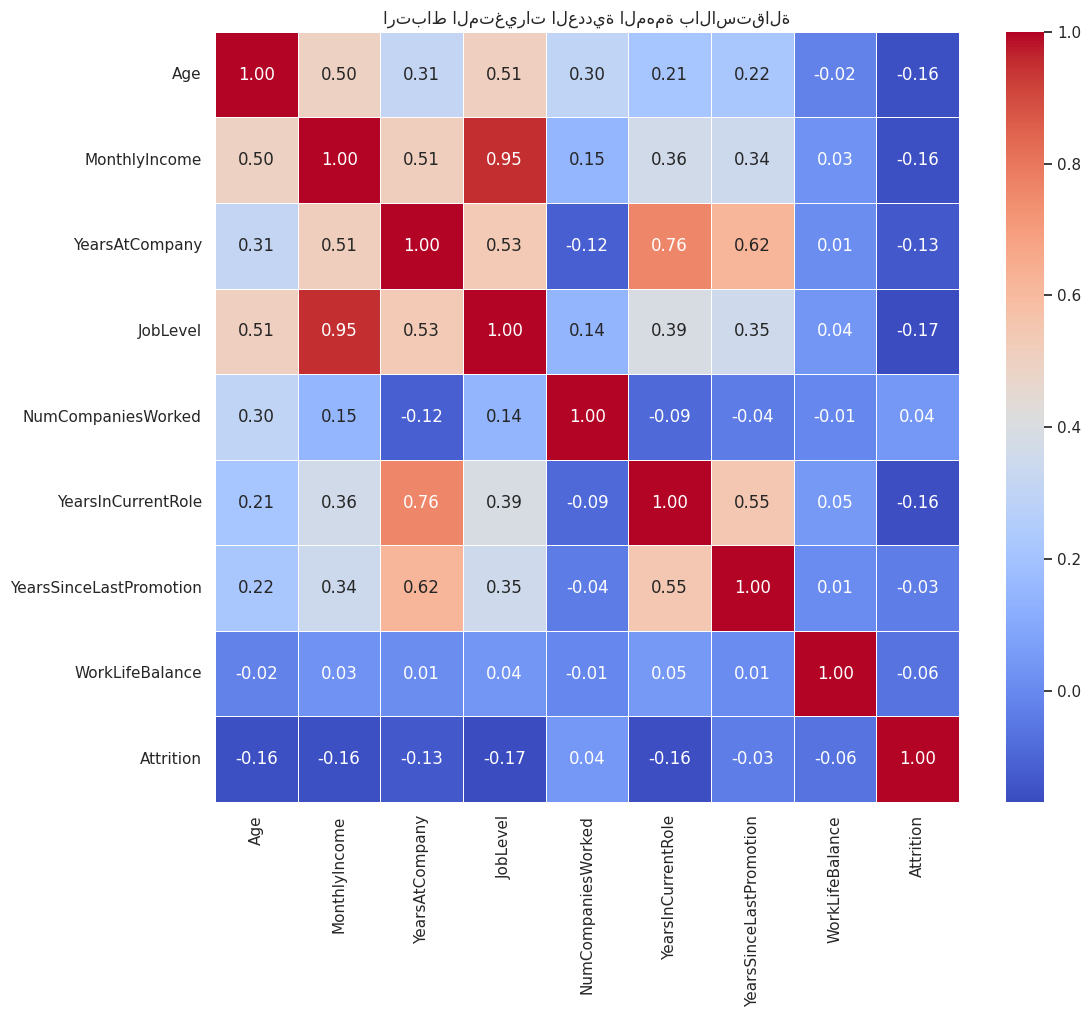

In [53]:
important_numeric = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'JobLevel', 'NumCompaniesWorked',
                     'YearsInCurrentRole', 'YearsSinceLastPromotion', 'WorkLifeBalance']

df_corr = data[important_numeric + ['Attrition']].copy()
df_corr['Attrition'] = df_corr['Attrition'].map({'No': 0, 'Yes': 1})

plt.figure(figsize=(12,10))
sns.heatmap(df_corr.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('ارتباط المتغيرات العددية المهمة بالاستقالة')
plt.show()

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# نبدأ بنسخ dataframe
df_clean = data.copy()

# تحويل الهدف (Target) إلى 0 و 1
df_clean['Attrition'] = df_clean['Attrition'].map({'No': 0, 'Yes': 1})

# فصل الميزات والهدف
X = df_clean.drop('Attrition', axis=1)
y = df_clean['Attrition']

# تحديد الأعمدة الفئية (Categorical Columns)
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# إنشاء ColumnTransformer لـ One-Hot Encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# إعادة تسمية الأعمدة بعد encoding
X_encoded = preprocessor.fit_transform(X)

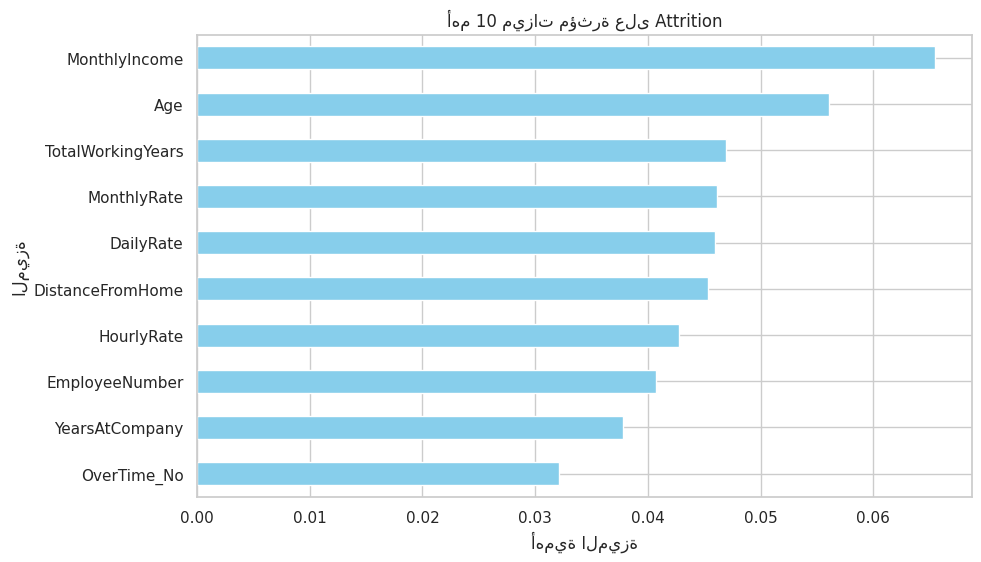

In [55]:
# Feature Selection باستخدام Random Forest
# نستخدم Random Forest لتحديد أهمية الميزات
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_encoded, y)

# الحصول على أهمية كل ميزة
feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_features = feature_names.tolist() + X.select_dtypes(exclude=['object']).columns.tolist()

importances = model.feature_importances_
feat_importances = pd.Series(importances, index=all_features).sort_values(ascending=False)

# رسم أهم 10 ميزات
plt.figure(figsize=(10,6))
feat_importances.head(10).plot(kind='barh', color='skyblue')
plt.title('أهم 10 ميزات مؤثرة على Attrition')
plt.xlabel('أهمية الميزة')
plt.ylabel('الميزة')
plt.gca().invert_yaxis()
plt.show()

In [56]:
# إعادة المعالجة الكاملة مرة أخرى مع pipeline
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# إنشاء pipeline يحتوي على preprocessing + model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# تدريب النموذج
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'Over18', 'OverTime'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

Accuracy: 0.8707482993197279

Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       247
           1       0.91      0.21      0.34        47

    accuracy                           0.87       294
   macro avg       0.89      0.60      0.64       294
weighted avg       0.88      0.87      0.84       294



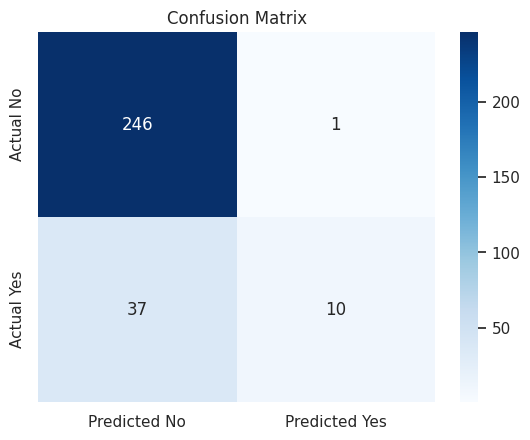

In [57]:
# التنبؤ على مجموعة الاختبار
y_pred = pipeline.predict(X_test)

# تقييم النموذج
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# رسم مصفوفة الارتباك
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# الدقة (Accuracy): 0.8707 → ~87%
# النموذج صنّف بشكل صحيح حوالي 87% من إجمالي الحالات .
# لكن الدقة وحدها قد تكون مضللة إذا كانت البيانات غير متوازنة

# 0: لم يستقل الموظف (247 حالة ) ← الفئة الأكثر
# 1: استقال الموظف (47 حالة ) ← الفئة الأقل

# للصف: 0 (لم يستقل)
# Precision
# : 0.87
# من بين كل الموظفين الذين تنبأ النموذج أنهم لن يستقيلوا، 87% منهم بالفعل لم يستقيلوا.
# Recall
# : 1.00
# النموذج اكتشف 100% من الموظفين الذين لم يستقيلوا (لا خطأ هنا).
# F1-Score
# : 0.93
# متوسط توافقي بين Precision و Recall، جيد جدًا للفئة
# 0

# للصف: 1 (استقال)
# Precision
# : 0.91
# من بين كل الموظفين الذين تنبأ النموذج أنهم سيستقيلون، 91% منهم فعلًا استقالوا.
# Recall
# : 0.21
# النموذج فقط اكتشف 21% من الموظفين الذين استقالوا فعليًا!
# F1-Score
# : 0.34
# متوسط توافقي ضعيف، يدل على أن النموذج ضعيف في اكتشاف حالات الاستقالة.

# النموذج جيد في التعرف على الموظفين الذين لن يستقيلوا (0)، لكنه ضعيف جدًا في اكتشاف الموظفين الذين سيستقيلون (1) .

# Recall = 0.21 يعني: من بين 47 موظفًا استقالوا، النموذج فقط عرف 10 منهم!
# هذا أمر خطير في سياق HR، لأن الهدف هو تحديد الموظفين المعرضين للاستقالة حتى يمكن التدخل لاحتفاظهم.
#  تفسير Accuracy عالية رغم الأداء الضعيف:
# لأن معظم البيانات هي من الفئة 0، فالنموذج يميل إلى التخمين الآمن بأن "الموظف لن يستقيل"، مما يعطي دقة عالية ولكن غير موثوقة في الواقع العملي.


# الحقيقة: لا (0)
# True Negatives = 247
# False Positives = 0
# الحقيقة: نعم (1)
# False Negatives = 37
# True Positives = 10

# أخطأ في 37 حالة استقالة (FP = 0، لكن FN = 37!)
# تنبأ بدقة عالية للفئة السالبة، لكنه فشل في اكتشاف الإيجابيات.


In [58]:
# استخدام Random Forest بدلاً من Logistic Regression
pipeline.set_params(classifier=RandomForestClassifier(n_estimators=100, random_state=42)).fit(X_train, y_train)
y_pred_rf = pipeline.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8503401360544217
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       247
           1       0.67      0.13      0.21        47

    accuracy                           0.85       294
   macro avg       0.76      0.56      0.57       294
weighted avg       0.83      0.85      0.80       294



In [59]:
# تحديث pipeline لإضافة class_weight
# هذه الطريقة تعطي وزنًا أعلى للفئة الأقل شيوعًا (Yes) أثناء التدريب
pipeline_balanced = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

# إعادة التدريب
pipeline_balanced.fit(X_train, y_train)

# التنبؤ والنتائج
y_pred_balanced = pipeline_balanced.predict(X_test)

print("Balanced Logistic Regression:")
print(classification_report(y_test, y_pred_balanced))

Balanced Logistic Regression:
              precision    recall  f1-score   support

           0       0.91      0.70      0.79       247
           1       0.29      0.66      0.41        47

    accuracy                           0.69       294
   macro avg       0.60      0.68      0.60       294
weighted avg       0.82      0.69      0.73       294



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
# الطريقة 2: استخدام SMOTE (Oversampling للصف Yes)
#هذه الطريقة "تولّد" بيانات مصطنعة للفئة Yes لجعلها أكثر تمثيلاً.
from imblearn.over_sampling import SMOTE
# إنشاء pipeline جديد مع SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

pipeline_smote = imbpipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(max_iter=1000))
])

# إعادة التدريب
pipeline_smote.fit(X_train, y_train)

# التوقع
y_pred_smote = pipeline_smote.predict(X_test)

print("Logistic Regression with SMOTE:")
print(classification_report(y_test, y_pred_smote))

Logistic Regression with SMOTE:
              precision    recall  f1-score   support

           0       0.90      0.68      0.78       247
           1       0.27      0.62      0.38        47

    accuracy                           0.67       294
   macro avg       0.59      0.65      0.58       294
weighted avg       0.80      0.67      0.71       294



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
#  الطريقة 3: استخدام نموذج قوي مثل Random Forest مع class_weight='balanced'
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'))
])

pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)

print("Random Forest with Balanced Classes:")
print(classification_report(y_test, y_pred_rf))

Random Forest with Balanced Classes:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.43      0.06      0.11        47

    accuracy                           0.84       294
   macro avg       0.64      0.52      0.51       294
weighted avg       0.78      0.84      0.78       294



In [63]:
# #  Feature Engineering
# نسبة الترقية إلى سنوات العمل
# ميزة جديدة: عدد الترقيات لكل سنة عمل
df_clean['PromotionPerYear'] = df_clean['YearsSinceLastPromotion'].apply(lambda x: 1/(x+1))

# ميزة جديدة: عدد التدريبات لكل سنة في الدور الحالي
df_clean['TrainingPerYearInRole'] = df_clean['TrainingTimesLastYear'] / (df_clean['YearsInCurrentRole'] + 1)

# تحديث X و y
X = df_clean.drop('Attrition', axis=1)
y = df_clean['Attrition']

In [64]:
from xgboost import XGBClassifier

pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=5))
])

pipeline_xgb.fit(X_train, y_train)
y_pred_xgb = pipeline_xgb.predict(X_test)

print("XGBoost Classifier:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.62      0.32      0.42        47

    accuracy                           0.86       294
   macro avg       0.75      0.64      0.67       294
weighted avg       0.84      0.86      0.84       294



In [65]:
# دالة لتقييم النموذج
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"=== {name} ===")
    print(classification_report(y_test, y_pred))

# تقييم النماذج الثلاثة
evaluate_model(pipeline, "Logistic Regression")
evaluate_model(pipeline_rf, "Random Forest")
evaluate_model(pipeline_xgb, "XGBoost")

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       247
           1       0.67      0.13      0.21        47

    accuracy                           0.85       294
   macro avg       0.76      0.56      0.57       294
weighted avg       0.83      0.85      0.80       294

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.43      0.06      0.11        47

    accuracy                           0.84       294
   macro avg       0.64      0.52      0.51       294
weighted avg       0.78      0.84      0.78       294



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:38:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


=== XGBoost ===
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.62      0.32      0.42        47

    accuracy                           0.86       294
   macro avg       0.75      0.64      0.67       294
weighted avg       0.84      0.86      0.84       294



In [70]:
new_employee = pd.DataFrame([{
    # --- الأعمدة الأساسية ---
    'Age': 30,
    'BusinessTravel': 'Travel_Rarely',
    'Department': 'Research & Development',
    'DistanceFromHome': 10,
    'Education': 3,
    'EducationField': 'Life Sciences',
    'EnvironmentSatisfaction': 3,
    'Gender': 'Male',  # <-- تم الإضافة
    'HourlyRate': 60,
    'JobInvolvement': 3,
    'JobLevel': 2,
    'JobRole': 'Research Scientist',
    'JobSatisfaction': 4,
    'MaritalStatus': 'Single',
    'MonthlyIncome': 5000,
    'MonthlyRate': 14000,
    'NumCompaniesWorked': 1,
    'Over18': 'Y',
    'OverTime': 'Yes',
    'PercentSalaryHike': 15,
    'PerformanceRating': 3,
    'RelationshipSatisfaction': 2,
    'StandardHours': 80,
    'StockOptionLevel': 1,
    'TotalWorkingYears': 8,
    'TrainingTimesLastYear': 3,
    'WorkLifeBalance': 3,
    'YearsAtCompany': 5,
    'YearsInCurrentRole': 2,
    'YearsSinceLastPromotion': 2,
    'YearsWithCurrManager': 4,
    'DailyRate': 1000,
    'EmployeeCount': 1,
    'EmployeeNumber': 123456
}])

In [71]:
# التوقع
prediction = pipeline_xgb.predict(new_employee)
prob = pipeline_xgb.predict_proba(new_employee)[0]

# العرض
if prediction[0] == 1:
    print("⚠️ هذا الموظف من المحتمل أن يستقيل!")
else:
    print("✅ هذا الموظف من غير المرجح أن يستقيل.")

print(f"الاحتمال: لا = {prob[0]:.2f}, نعم = {prob[1]:.2f}")

✅ هذا الموظف من غير المرجح أن يستقيل.
الاحتمال: لا = 1.00, نعم = 0.00


In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier

In [73]:
pipeline_dt = imbpipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

pipeline_svm = imbpipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', SVC(class_weight='balanced', probability=True, random_state=42))
])

pipeline_lgbm = imbpipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LGBMClassifier(class_weight='balanced', random_state=42))
])

In [74]:
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))

In [75]:
evaluate_model(pipeline_dt, "Decision Tree")
evaluate_model(pipeline_svm, "Support Vector Machine")
evaluate_model(pipeline_lgbm, "LightGBM")


=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       247
           1       0.35      0.36      0.35        47

    accuracy                           0.79       294
   macro avg       0.61      0.62      0.61       294
weighted avg       0.79      0.79      0.79       294


=== Support Vector Machine ===
              precision    recall  f1-score   support

           0       0.90      0.45      0.60       247
           1       0.20      0.72      0.31        47

    accuracy                           0.50       294
   macro avg       0.55      0.59      0.46       294
weighted avg       0.78      0.50      0.56       294

[LightGBM] [Info] Number of positive: 986, number of negative: 986
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003297 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9495
[LightGBM] [Info] Number of 

In [76]:
# التوقع
prediction = pipeline_svm.predict(new_employee)
prob = pipeline_xgb.predict_proba(new_employee)[0]

# العرض
if prediction[0] == 1:
    print("⚠️ هذا الموظف من المحتمل أن يستقيل!")
else:
    print("✅ هذا الموظف من غير المرجح أن يستقيل.")

print(f"الاحتمال: لا = {prob[0]:.2f}, نعم = {prob[1]:.2f}")

⚠️ هذا الموظف من المحتمل أن يستقيل!
الاحتمال: لا = 1.00, نعم = 0.00
